<a href="https://colab.research.google.com/github/kamyayuki/rnco/blob/main/L2/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import requests

# Пример запроса к TCIA API



The Cancer Imaging Archive (TCIA) предоставляет доступ к медицинским изображениям через API. Вы можете использовать библиотеку requests для загрузки данных из TCIA:

In [ ]:
import requests

# Пример запроса к TCIA API
url = "https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=TCGA-BRCA"
response = requests.get(url)

# Проверка ответа
if response.status_code == 200:
    print("Данные получены успешно")
else:
    print("Ошибка получения данных")



Данные получены успешно


Данные приходят в JSON формате.
В этом примере запрос отправляется с параметром format=json, чтобы вернуть данные в формате JSON.
Преобразование ответа в JSON:
response.json() позволяет конвертировать ответ в словарь Python, с которым будем работать дальше.
Обработка JSON-ответа:
Сначала печатаем весь JSON для ознакомления.

In [ ]:
import requests
import json

# Пример запроса к TCIA API, предполагающий JSON формат
url = "https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=TCGA-BRCA&format=json"
response = requests.get(url)

# Проверка ответа
if response.status_code == 200:
    print("Данные получены успешно")

    # Преобразование ответа в JSON
    data = response.json()
    print(json.dumps(data, indent=4))  # Печать данных в формате JSON с отступами

    # Обработка данных
    for item in data:
        series_instance_uid = item.get('SeriesInstanceUID', 'N/A')
        modality = item.get('Modality', 'N/A')
        protocol_name = item.get('ProtocolName', 'N/A')
        body_part_examined = item.get('BodyPartExamined', 'N/A')

        # Печать извлеченной информации
        print(f"SeriesInstanceUID: {series_instance_uid}")
        print(f"Modality: {modality}")
        print(f"ProtocolName: {protocol_name}")
        print(f"BodyPartExamined: {body_part_examined}")
        print('-' * 30)
else:
    print("Ошибка получения данных")


Выходные данные были обрезаны до нескольких последних строк (5000).
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.240831734808981235886758156447
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.339963655672432655223423353554
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.325607836963460379034020654281
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.282877615330280376078734696973
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.199532769200268583433474778786
Modality: MR
ProtocolName: N/A
BodyPartExamined: BREAST
------------------------------
SeriesInstanceUID: 1.3.6.1.4.1.14519.5.2.1.6450.4002.108665300491756890793844

**Получение идентификаторов для загрузки изображений**

Используя первый запрос к TCIA API, получили метаданные, такие как SeriesInstanceUID для каждой серии изображений.
Эти идентификаторы нужны для следующего шага — получения ссылок на сами изображения.
Запрос на загрузку изображений с использованием SeriesInstanceUID
Чтобы загрузить все изображения в определенной серии, нужно выполнить запрос к TCIA API с использованием SeriesInstanceUID

In [12]:
import os
import requests

# Пример использования SeriesInstanceUID
series_instance_uid = "1.3.6.1.4.1.14519.5.2.1.6450.4002.265963154110062013582166845425"  # Пример идентификатора

# URL для загрузки изображений
url = f"https://services.cancerimagingarchive.net/services/v3/TCIA/query/getImage?SeriesInstanceUID={series_instance_uid}"
response = requests.get(url, stream=True)

# Путь для сохранения ZIP-файла
output_path = "/content/images.zip"

# Создание необходимых папок, если их нет
folder_path = os.path.dirname(output_path)
os.makedirs(folder_path, exist_ok=True)

# Проверка ответа и сохранение изображения
if response.status_code == 200:
    print(f"Сохранение файла в {output_path}")
    with open(output_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)
    print(f"Изображения успешно загружены и сохранены как {output_path}")
else:
    print("Ошибка при загрузке изображений")


Сохранение файла в /content/images.zip
Изображения успешно загружены и сохранены как /content/images.zip


In [13]:
import zipfile

# Распаковка загруженного ZIP-файла
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("images")  # Папка для распакованных изображений
print("Файлы успешно распакованы")


Файлы успешно распакованы


Для чтения DICOM файлов используйте pydicom, а для визуализации изображений — matplotlib.

In [16]:
!pip install pydicom


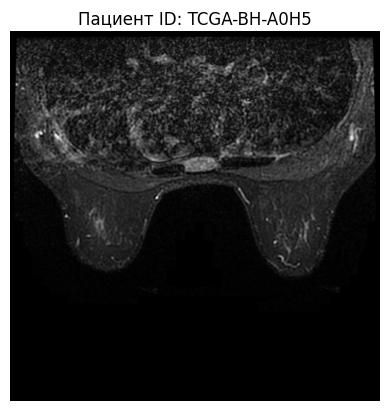

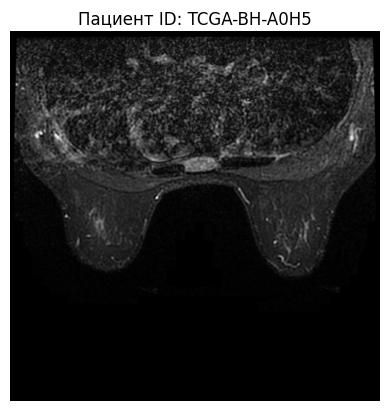

In [17]:
import os
import pydicom
import matplotlib.pyplot as plt

# Папка с распакованными изображениями
dicom_folder = "images"

# Чтение всех DICOM-файлов в папке и визуализация первого изображения
for filename in os.listdir(dicom_folder):
    if filename.endswith(".dcm"):
        dicom_path = os.path.join(dicom_folder, filename)
        dicom_data = pydicom.dcmread(dicom_path)

        # Получение массива пикселей изображения
        image = dicom_data.pixel_array

        # Визуализация изображения
        plt.imshow(image, cmap="gray")
        plt.title(f"Пациент ID: {dicom_data.PatientID}")
        plt.axis("off")
        plt.show()
        break  # Визуализируем только первое изображение


 библиотеки, как OpenCV, scikit-image, и NumPy предоставляют множество инструментов для фильтрации, повышения контраста и удаления шума.